In [3]:
import numpy as np
np.log(1.22)

0.19885085874516517

{'args': {'train': True, 'decode': False, 'action': 'train', '--cuda': False, '--train-src': './en_es_data/train_tiny.es', '--train-tgt': './en_es_data/train_tiny.en', '--dev-src': './en_es_data/dev_tiny.es', '--dev-tgt': './en_es_data/dev_tiny.en', '--vocab': 'vocab_tiny_q1.json', '--seed': 0, '--batch-size': 2, '--embed-size': 256, '--hidden-size': 256, '--clip-grad': 5.0, '--log-every': 10, '--max-epoch': 101, '--input-feed': False, '--patience': 5, '--max-num-trial': 5, '--lr-decay': 0.5, '--beam-size': 5, '--sample-size': 5, '--lr': 0.001, '--uniform-init': 0.1, '--save-to': 'model.bin', '--valid-niter': 100, '--dropout': 0.3, '--max-decoding-time-step': 70, '--no-char-decoder': True}, 'log_iter': 10, 'train_ppls': [120.10613802740963, 97.42643458556033, 83.05507773715017, 70.52420889311654, 59.4321541646377, 48.938993578514946, 40.30285402941984, 35.476616415473586, 31.608989647543517, 23.524791195352563, 19.029357962858263, 16.61310562359883, 13.190005591387743, 9.98517000893952

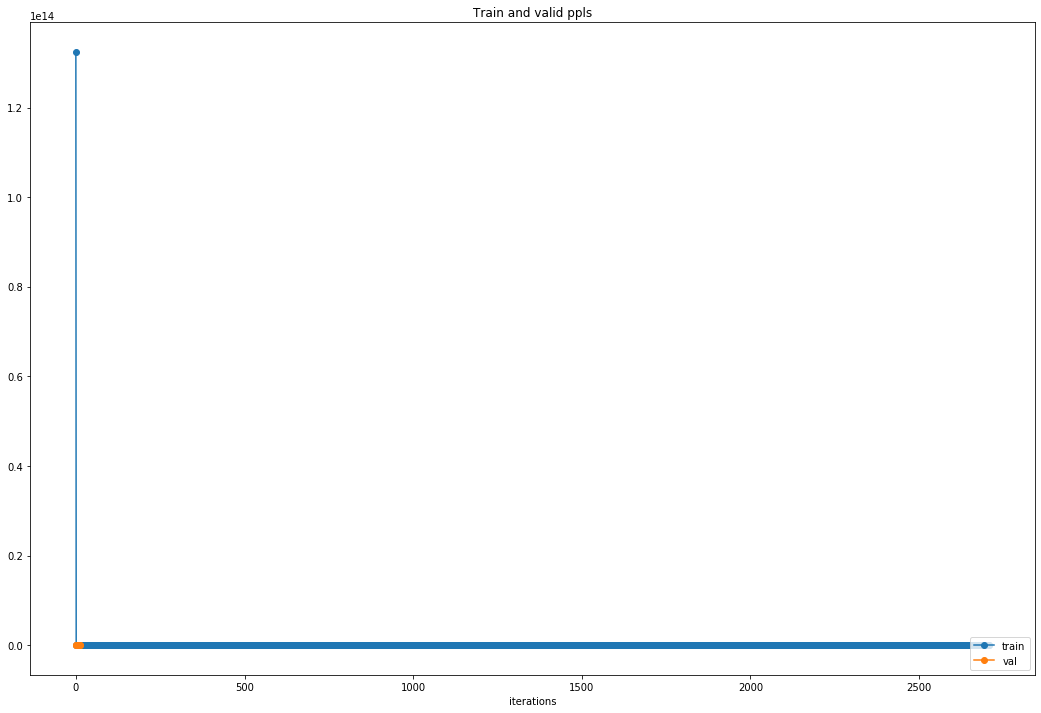

In [11]:
import json
import matplotlib.pyplot as plt

file_name = 'outputs/loss_10-21-2019-06:07PM'
with open(file_name) as f:
    all_results = json.load(f)
    print(result)
    
%matplotlib inline


plt.title('Train and valid ppls')
plt.plot(all_results['train_ppls'], '-o', label='train')
plt.plot(all_results['valid_ppls'], '-o', label='val')
# plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('iterations')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(18, 12)
plt.show()